In [1]:
import pandas as pd
reviews = pd.read_csv('IMDB_Reviews.csv')
reviews = reviews.sample(5000)
pd.set_option('display.max_colwidth', 300)
reviews.head(10)

,review,sentiment
33163,"Given its time of release, the story that unravels in 1950 thriller 'Panic in the Streets' was hardly a surprise. The corpse of a mysterious illegal immigrant is found and passed off as a nobody until further examination from a public health inspector who claims the corpse carries a strain of bu...",positive
15007,I am not understanding why people are praising this movie. I didn't like it at all. I watch it with several people. None of them cared for it either. First of all. It is just plain that another low budget studio is trying to cash in on a big name story. The actual filming looks like a live TV in...,negative
49031,"I borrowed this movie despite its extremely low rating, because I wanted to see how the crew manages to animate the presence of multiple worlds. As a matter of fact, they didn't - at least, so its seems. Some cameo appearance cut rather clumsily into the movie - that's it, this is what the major...",positive
11421,"Anyone who appreciates fine acting and ringing dialogue will love<br /><br />this film. Taken from Ronald 'Taking Sides' Harwood, it's a funny<br /><br />and ultimately excoriating analysis of a relationship between two<br /><br />very 'actorly' types. Albert Finney is sublime as the despotic<br...",positive
9029,"Ah! When good actors take on bland material! If you are thinking of this movie as a tight police thriller you may be disappointed. While the situations are very true to life, the plot proceeds at a very predictable clip and you can pretty well see what lays ahead way before the actors take you t...",positive
4017,"Carrie Fisher has stated on more than one occasion that she made this movie during a period of her life when she had a heavy cocaine problem, and she doesn't remember very much of it. That would explain why she made this film, but it doesn't explain why anyone else in the cast or crew did; I can...",negative
1909,"A very hyped-up, slick, edgy reinterpretation.<br /><br />They've fallen into the ""because it's modern, it has to be hyped-up, slick, etc."" trap.<br /><br />""Romeo and Juliet"" carried this idea off much more successfully, but I really think it's time we move beyond the two extremes here (period ...",negative
37136,"A train holding union soldiers is transporting $300,000 of gold, along with a banker Clayton, who's there to see it reaches its destination, but it's suddenly robbed by the bandit Monetero. However Bahunda nicks off with the gold and hides it, but when Monetero tries to get it out of him, he's k...",positive
26015,"The feature length CGI movie has just been released this year, but whilst it will provide kids a lot of entertainment, for die-hard Alvin fanatics and followers who grew up with the 60s and 80s versions of the cartoon shows, The Chipmunk Adventure is probably the best Alvin and the Chipmunks bas...",positive
30221,"Van Sant copies Hitchcock's masterpiece shot for shot including some modern facets: a walkman, and nudity from Anne Heche. Unless you have a strong desire to see Ms. Heche naked there is absolutely NO reason to see this film instead of the original. Hitchcock's masterpiece is much better and Van...",negative


### 1. Clean Text

In [2]:
#remove html tags in the text with regular expression
reviews['review'] = reviews['review'].str.replace(r'<[^>]+>', ' ', regex=True)
#remove special characters and line breaks in the text with regular expression
reviews['review'] = reviews['review'].str.replace(r'([^\s\w_])+', ' ', regex=True)
reviews['review'] = reviews['review'].str.replace(r'[\n\r]', ' ', regex=True)
#remove special characters and line breaks in the text with regular expression
reviews['review'] = reviews['review'].str.replace(r'\d+', ' ', regex=True)
reviews.head(10)

,review,sentiment
33163,Given its time of release the story that unravels in thriller Panic in the Streets was hardly a surprise The corpse of a mysterious illegal immigrant is found and passed off as a nobody until further examination from a public health inspector who claims the corpse carries a strain of bubon...,positive
15007,I am not understanding why people are praising this movie I didn t like it at all I watch it with several people None of them cared for it either First of all It is just plain that another low budget studio is trying to cash in on a big name story The actual filming looks like a live TV in...,negative
49031,I borrowed this movie despite its extremely low rating because I wanted to see how the crew manages to animate the presence of multiple worlds As a matter of fact they didn t at least so its seems Some cameo appearance cut rather clumsily into the movie that s it this is what the major...,positive
11421,Anyone who appreciates fine acting and ringing dialogue will love this film Taken from Ronald Taking Sides Harwood it s a funny and ultimately excoriating analysis of a relationship between two very actorly types Albert Finney is sublime as the despotic Shakespearean actor who barely ...,positive
9029,Ah When good actors take on bland material If you are thinking of this movie as a tight police thriller you may be disappointed While the situations are very true to life the plot proceeds at a very predictable clip and you can pretty well see what lays ahead way before the actors take you t...,positive
4017,Carrie Fisher has stated on more than one occasion that she made this movie during a period of her life when she had a heavy cocaine problem and she doesn t remember very much of it That would explain why she made this film but it doesn t explain why anyone else in the cast or crew did I can...,negative
1909,A very hyped up slick edgy reinterpretation They ve fallen into the because it s modern it has to be hyped up slick etc trap Romeo and Juliet carried this idea off much more successfully but I really think it s time we move beyond the two extremes here period piece vs edgy film ...,negative
37136,A train holding union soldiers is transporting of gold along with a banker Clayton who s there to see it reaches its destination but it s suddenly robbed by the bandit Monetero However Bahunda nicks off with the gold and hides it but when Monetero tries to get it out of him he s kille...,positive
26015,The feature length CGI movie has just been released this year but whilst it will provide kids a lot of entertainment for die hard Alvin fanatics and followers who grew up with the s and s versions of the cartoon shows The Chipmunk Adventure is probably the best Alvin and the Chipmunks based...,positive
30221,Van Sant copies Hitchcock s masterpiece shot for shot including some modern facets a walkman and nudity from Anne Heche Unless you have a strong desire to see Ms Heche naked there is absolutely NO reason to see this film instead of the original Hitchcock s masterpiece is much better and Van...,negative


In [3]:
#further clean text with what's already used
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import nltk

def tokenizer(description):
    #tokenize to extract words
    description = description.lower()
    description = re.sub('[^a-zA-Z0-9]', ' ', description)
    tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
    words = tokenizer.tokenize(description)
    tokenized_words = ' '.join(words)
    return tokenized_words

def remove_stopwords(words):
    tokens = words.split(' ')
    stop = set(stopwords.words('english'))
    filtered_words = ' '.join([w for w in tokens if not w in stop])
    return filtered_words

def get_part_of_speech_tags(token):
    
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    
    tag = nltk.pos_tag([token])[0][1][0].upper()
    
    return tag_dict.get(tag, wordnet.NOUN)

def postag_lemmentization(words):
    #Your code to implement WordNet lemmatizer with POS tags in column description_clean
    token_list = words.split(' ')
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = ' '.join([lemmatizer.lemmatize(token, get_part_of_speech_tags(token)) for token in token_list])
    return lemmatized_words

In [4]:
%%time
reviews['review'] = reviews['review'].apply(tokenizer)
reviews['review'] = reviews['review'].apply(remove_stopwords)
reviews['review'] = reviews['review'].apply(postag_lemmentization)
reviews.head()

CPU times: user 31.5 s, sys: 4.55 s, total: 36 s
Wall time: 36.1 s


,review,sentiment
33163,give time release story unravels thriller panic street hardly surprise corpse mysterious illegal immigrant found pass nobody examination public health inspector claim corpse carry strain bubonic plague yet current drama world today strangely help film appear credible today viewer cast crew flawl...,positive
15007,understand people praise movie like watch several people none care either first plain another low budget studio try cash big name story actual film look like live tv interview makeup bad watch movie along dvd extra see lot enthusiasm people participate talent fact appear book fact distort invent...,negative
49031,borrow movie despite extremely low rating want see crew manages animate presence multiple world matter fact least seem cameo appearance cut rather clumsily movie majority viewer think however surprise come end unfortunately probably viewer already stop movie also astonish saw brazilian portugues...,positive
11421,anyone appreciates fine act ring dialogue love film take ronald take side harwood funny ultimately excoriate analysis relationship two actorly type albert finney sublime despotic shakespearean actor barely notice world war rag around intent crumble fortune theatre company psychological emotional...,positive
9029,ah good actor take bland material think movie tight police thriller may disappointed situation true life plot proceeds predictable clip pretty well see lay ahead way actor take many criminal secondary figure really stereotype motion much dialog plain silly love see good actor rise kind material ...,positive


In [5]:
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.download('averaged_perceptron_tagger')

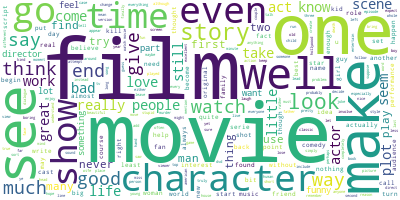

In [6]:
#word cloud
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Join the different processed titles together.
text_string = ','.join(list(reviews['review'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(text_string)
# Visualize the word cloud
wordcloud.to_image()

### 2. Topic Modeling

In [7]:
import gensim
from gensim.utils import simple_preprocess

def text_to_words(texts):
    return [[word for word in simple_preprocess(str(text), deacc=True)]
            for text in texts]

text = reviews.review.values.tolist()
text_words = text_to_words(text)
print(text_words[0])

['give', 'time', 'release', 'story', 'unravels', 'thriller', 'panic', 'street', 'hardly', 'surprise', 'corpse', 'mysterious', 'illegal', 'immigrant', 'found', 'pass', 'nobody', 'examination', 'public', 'health', 'inspector', 'claim', 'corpse', 'carry', 'strain', 'bubonic', 'plague', 'yet', 'current', 'drama', 'world', 'today', 'strangely', 'help', 'film', 'appear', 'credible', 'today', 'viewer', 'cast', 'crew', 'flawless', 'richard', 'widmark', 'first', 'role', 'follow', 'breakthrough', 'performance', 'night', 'city', 'jack', 'palance', 'chill', 'film', 'debut', 'also', 'star', 'film', 'paul', 'douglas', 'young', 'rather', 'cute', 'barbara', 'bel', 'geddes', 'whole', 'slew', 'uncredited', 'non', 'professional', 'actor', 'typical', 'director', 'kazan', 'fill', 'remain', 'slot', 'elia', 'kazan', 'directs', 'joe', 'macdonald', 'film', 'would', 'later', 'work', 'richard', 'widmark', 'much', 'superior', 'pickup', 'south', 'street', 'great', 'alfred', 'newman', 'score', 'nearly', 'everyone',

In [8]:
#data = reviews.comments.values.tolist()
#data_words = [[word for word in doc.split()] for doc in data]
#data_words[0]

In [9]:
import gensim.corpora as corpora
from gensim.models import TfidfModel

# Create Dictionary
word_dict = corpora.Dictionary(text_words)
word_dict.filter_extremes(no_below=5, no_above=0.1, keep_n=2000)
# Create Corpus
texts = text_words
# Term Count Frequency
corpus_vec = [word_dict.doc2bow(text) for text in texts]

# View
print(corpus_vec[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 3), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1)]


In [10]:
from pprint import pprint
# number of topics
num_topics = 30
# Build LDA model
lda_model = gensim.models.LdaModel(corpus=corpus_vec, id2word=word_dict, num_topics=num_topics, iterations=50)
# Print the Keyword in the 30 topics
pprint(lda_model.print_topics(num_words=20))

[(6,
  '0.010*"music" + 0.007*"original" + 0.006*"michael" + 0.006*"someone" + '
  '0.006*"touch" + 0.005*"writer" + 0.005*"comedy" + 0.005*"call" + '
  '0.005*"laugh" + 0.004*"girl" + 0.004*"kid" + 0.004*"god" + 0.004*"grace" + '
  '0.004*"oh" + 0.003*"eye" + 0.003*"answer" + 0.003*"sound" + 0.003*"anyone" '
  '+ 0.003*"let" + 0.003*"relationship"'),
 (19,
  '0.007*"effect" + 0.006*"gay" + 0.006*"scientist" + 0.006*"half" + '
  '0.005*"poor" + 0.005*"white" + 0.005*"read" + 0.004*"light" + 0.004*"hour" '
  '+ 0.004*"family" + 0.004*"house" + 0.004*"girl" + 0.004*"special" + '
  '0.004*"joke" + 0.004*"might" + 0.004*"probably" + 0.004*"science" + '
  '0.004*"black" + 0.004*"rent" + 0.004*"second"'),
 (20,
  '0.011*"canadian" + 0.009*"scary" + 0.009*"hitchcock" + 0.006*"shot" + '
  '0.006*"stunt" + 0.006*"second" + 0.006*"bone" + 0.005*"call" + 0.005*"top" '
  '+ 0.005*"city" + 0.005*"screen" + 0.005*"price" + 0.005*"cinema" + '
  '0.005*"especially" + 0.005*"type" + 0.005*"robert" + 0.

Visualize from models

In [11]:
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from matplotlib import pyplot as plt
# Generate a word cloud image for given topic
def draw_word_cloud(n):
    topic_words = dict(lda_model.show_topic(n, topn=50))
    words = " ".join
    wordcloud = WordCloud(background_color="white", contour_width=3, contour_color='steelblue')
    # Generate a word cloud
    wordcloud.generate_from_frequencies(topic_words)
    # Visualize the word cloud
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

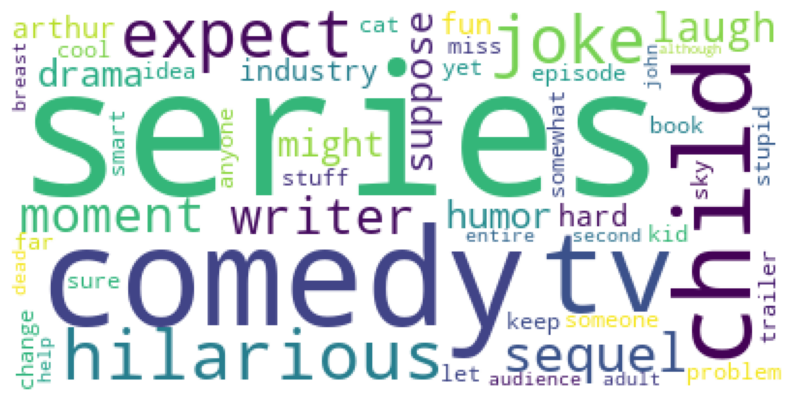

In [12]:
draw_word_cloud(0)

### 3. Sentiment Analysis

In [13]:
reviews['sentiment'] = reviews['sentiment'].str.replace('positive', '1')
reviews['sentiment'] = reviews['sentiment'].str.replace('negative', '0')
reviews['sentiment'] = reviews['sentiment'].astype(int)
reviews.head(10)

,review,sentiment
33163,give time release story unravels thriller panic street hardly surprise corpse mysterious illegal immigrant found pass nobody examination public health inspector claim corpse carry strain bubonic plague yet current drama world today strangely help film appear credible today viewer cast crew flawl...,1
15007,understand people praise movie like watch several people none care either first plain another low budget studio try cash big name story actual film look like live tv interview makeup bad watch movie along dvd extra see lot enthusiasm people participate talent fact appear book fact distort invent...,0
49031,borrow movie despite extremely low rating want see crew manages animate presence multiple world matter fact least seem cameo appearance cut rather clumsily movie majority viewer think however surprise come end unfortunately probably viewer already stop movie also astonish saw brazilian portugues...,1
11421,anyone appreciates fine act ring dialogue love film take ronald take side harwood funny ultimately excoriate analysis relationship two actorly type albert finney sublime despotic shakespearean actor barely notice world war rag around intent crumble fortune theatre company psychological emotional...,1
9029,ah good actor take bland material think movie tight police thriller may disappointed situation true life plot proceeds predictable clip pretty well see lay ahead way actor take many criminal secondary figure really stereotype motion much dialog plain silly love see good actor rise kind material ...,1
4017,carrie fisher state one occasion make movie period life heavy cocaine problem remember much would explain make film explain anyone else cast crew believe everybody coke problem one absolute bad movie ever make say something blame laid foot director tim kincaid writer buddy giovinazzo obvious pic...,0
1909,hyped slick edgy reinterpretation fall modern hyped slick etc trap romeo juliet carry idea much successfully really think time move beyond two extreme period piece v edgy film modern retell mean movie look like magazine ad anything drug gun trapping subtle honeyed word macbeth would far powerful...,0
37136,train hold union soldier transport gold along banker clayton see reach destination suddenly robbed bandit monetero however bahunda nick gold hide monetero try get kill soldier clue medallion monetero capture soon would execute stranger dress priest come bounty monetero offer save life half gold ...,1
26015,feature length cgi movie release year whilst provide kid lot entertainment die hard alvin fanatic follower grow version cartoon show chipmunk adventure probably best alvin chipmunk base animate movie ever starter animation ever terrific character design cartoon unlike motion picture film sheer f...,1
30221,van sant copy hitchcock masterpiece shot shot include modern facet walkman nudity anne heche unless strong desire see m heche naked absolutely reason see film instead original hitchcock masterpiece much well van sant fails realize hiding nudity gore original shower scene terrify ask janet leigh ...,0


In [14]:
X = reviews['review'] # extract column with review
Y = reviews['sentiment'] # extract column with sentiment

In [15]:
import numpy as np
# tokenize the news text and convert data in matrix format
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_vec = vectorizer.fit_transform(X)

In [16]:
# Transform data by applying term frequency inverse document frequency (TF-IDF) 
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer() #by default applies "l2" normalization
X_tfidf = tfidf.fit_transform(X_vec)

In [17]:
# Apply Naive Bayes algorithm to train data
# Extract the news body and labels for training the classifier
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_tfidf, Y, test_size = 0.2, random_state = 0)

In [18]:
# Train the NB classifier
from sklearn.naive_bayes import MultinomialNB
classifer = MultinomialNB()
classifer.fit(X_train, Y_train)

MultinomialNB()

In [19]:
# Predicting the Test set results
Y_pred = classifer.predict(X_test)

In [20]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[410 105]
 [ 70 415]]


In [21]:
# Classification Report
from sklearn.metrics import classification_report
cr = classification_report(Y_test, Y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       515
           1       0.80      0.86      0.83       485

    accuracy                           0.82      1000
   macro avg       0.83      0.83      0.82      1000
weighted avg       0.83      0.82      0.82      1000



In [22]:
# Train the SVM classifier
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [23]:
# Predicting the Test set results
Y_pred = classifer.predict(X_test)

In [24]:
# Classification Report
from sklearn.metrics import classification_report
cr = classification_report(Y_test, Y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       515
           1       0.80      0.86      0.83       485

    accuracy                           0.82      1000
   macro avg       0.83      0.83      0.82      1000
weighted avg       0.83      0.82      0.82      1000

